In [1]:



import statsmodels.api as sm
import statsmodels.formula.api as smf

import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import _tree
 
feature_names = ['Temperature', 'Nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pain',
                 'Burning of urethra', 'Inflammation', 'Nephritis']
 
data = pd.read_csv(r'Lab 5 Data\diagnosis.csv', encoding='utf-16',
                   sep = '\t', decimal = ',', names = feature_names)
df = data

5


[Text(133.92000000000002, 195.696, 'X[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(66.96000000000001, 152.208, 'X[2] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(100.44000000000001, 108.72, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(200.88000000000002, 152.208, 'X[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(167.40000000000003, 108.72, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(234.36, 108.72, 'X[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(200.88000000000002, 65.232, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(267.84000000000003, 65.232, 'X[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(234.36, 21.744, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(301.32000000000005, 2

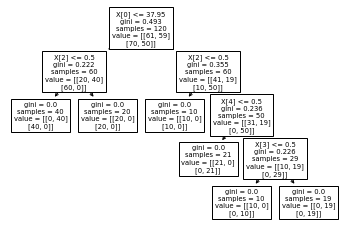

In [2]:

 
df['Nausea'].replace(('yes', 'no'), (1, 0), inplace=True)
df['Lumbar pain'].replace(('yes', 'no'), (1, 0), inplace=True)
df['Urine pushing'].replace(('yes', 'no'), (1, 0), inplace=True)
df['Micturition pain'].replace(('yes', 'no'), (1, 0), inplace=True)
df['Burning of urethra'].replace(('yes', 'no'), (1, 0), inplace=True)
df['Inflammation'].replace(('yes', 'no'), (1, 0), inplace=True)
df['Nephritis'].replace(('yes', 'no'), (1, 0), inplace=True)
 
X = df.iloc[:,0:6]
Y = df.iloc[:,6:8]
 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
tree.plot_tree(clf.fit(X, Y))

In [3]:
  
#SOURCE FOR THIS FUNCTION: PROFESSOR REZA RAJATI OF USC
def tree_to_pseudo(tree, feature_names):
 
              '''
              Outputs a decision tree model as if/then pseudocode
             
              Parameters:
              -----------
              tree: decision tree model
                             The decision tree to represent as pseudocode
              feature_names: list
                             The feature names of the dataset used for building the decision tree
              '''
 
              left = tree.tree_.children_left
              right = tree.tree_.children_right
              threshold = tree.tree_.threshold
              features = [feature_names[i] for i in tree.tree_.feature]
              value = tree.tree_.value
 
              def recurse(left, right, threshold, features, node, depth=0):
                             indent = "  " * depth
                             if (threshold[node] != -2):
                                           print (indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                                           if left[node] != -1:
                                                          recurse (left, right, threshold, features, left[node], depth+1)
                                                          print (indent,"} else {")
                                                          if right[node] != -1:
                                                                        recurse (left, right, threshold, features, right[node], depth+1)
                                                          print (indent,"}")
                             else:
                                           print (indent,"return " + str(value[node]))
 
              recurse(left, right, threshold, features, 0)
 
 
tree_to_pseudo(clf,feature_names)
#last two columns 
 
 

 if ( Temperature <= 37.95000076293945 ) {
   if ( Lumbar pain <= 0.5 ) {
     return [[ 0. 40.]
 [40.  0.]]
   } else {
     return [[20.  0.]
 [20.  0.]]
   }
 } else {
   if ( Lumbar pain <= 0.5 ) {
     return [[10.  0.]
 [10.  0.]]
   } else {
     if ( Micturition pain <= 0.5 ) {
       return [[21.  0.]
 [ 0. 21.]]
     } else {
       if ( Urine pushing <= 0.5 ) {
         return [[10.  0.]
 [ 0. 10.]]
       } else {
         return [[ 0. 19.]
 [ 0. 19.]]
       }
     }
   }
 }


In [8]:

feature_names = []
for x in range(0,128):
    feature_names.append(x)
   
 ###########part a ###############  
communities = pd.read_csv(r'Lab 5 Data\communities.csv',
                   sep = ',', names = feature_names)
df = communities
 
 
train = df.iloc[0:1495]
test = df.iloc[1495:1995]
 

In [9]:

#dropping non predictive features
train.drop(columns = [0,1,2,3,4], inplace=True)
test.drop(columns = [0,1,2,3,4], inplace=True)
 
#Imputing
#This runs column by column and fills in the missing values in each column with
#that columns' respective mean. Note we split the process by training and test set.
train.fillna(train.mean())
test.fillna(test.mean())
 
 

C:\Users\Mark\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,?,?,?,?,0.00,?,0.12
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,?,?,?,?,0.00,?,0.11
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,?,?,?,?,0.00,?,0.12
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,?,?,?,?,0.00,?,0.06
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,?,?,?,?,0.00,?,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


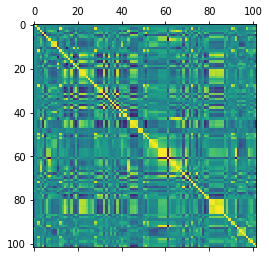

          0         4         5         6         7         8         9    \
0    1.000000 -0.002857 -0.079569 -0.049505 -0.046154  0.213990 -0.318602   
4   -0.002857  1.000000 -0.007552  0.035488  0.003524 -0.004436 -0.001317   
5   -0.079569 -0.007552  1.000000 -0.046148  0.231178 -0.300845  0.181603   
6   -0.049505  0.035488 -0.046148  1.000000 -0.067109 -0.235907  0.201996   
7   -0.046154  0.003524  0.231178 -0.067109  1.000000 -0.794389 -0.106738   
..        ...       ...       ...       ...       ...       ...       ...   
118 -0.040350  0.017846  0.713652 -0.015078  0.149758 -0.131389 -0.001084   
119 -0.137940 -0.012570  0.231897 -0.004072  0.095053 -0.337458  0.389944   
120 -0.021431 -0.000541  0.270356 -0.051506  0.147023 -0.215636  0.296921   
125 -0.075305 -0.023780  0.466352 -0.094368  0.260793 -0.276234  0.101888   
127 -0.211398 -0.032577  0.367157 -0.034923  0.631264 -0.684770  0.037622   

          10        11        12   ...       96        97        98   \
0  

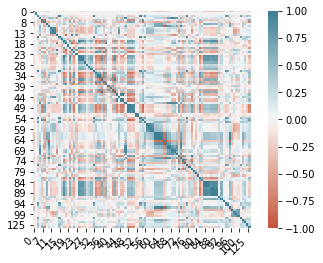

In [10]:

import matplotlib.pyplot as plt
 
plt.matshow(df.corr())
plt.show()
print(df.corr())
 
import seaborn as sns
corr = df.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#source--https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
 

In [14]:
stds = train.std(axis = 0)
means = train.mean(axis = 0)

 
cov = [float(b) / float(m) for b,m in zip(stds,means)]
cov.sort(reverse=True)
#floor of root 122 is 11. We want the features with the 11 highest coefficients of variation.
for x in range(0,11):
    print(cov[x])

4.292922989491593
3.470952139705214
3.0589643472092356
2.9266352462888148
2.552945511727576
2.3424431162181505
2.2411046245803745
2.0384614919156445
1.9684670491351257
1.6454078602149063
1.612091005228411


In [23]:
X = train.iloc[:, 0:122]
Y = train.iloc[:, 122]
#go to 122 since we dropped 5 columns
print(X.head, Y.head())

    

<bound method NDFrame.head of        5     6     7     8     9     10    11    12    13    14   ...   117  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...  0.29   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...     ?   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...     ?   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...     ?   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...     ?   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1490  0.00  0.59  0.01  0.69  1.00  0.07  0.41  0.28  0.23  0.57  ...     ?   
1491  0.16  0.62  0.03  0.74  0.48  0.42  0.44  0.57  0.40  0.25  ...  0.38   
1492  0.01  0.36  0.95  0.24  0.03  0.01  0.44  0.42  0.27  0.63  ...     ?   
1493  0.06  0.53  0.01  0.98  0.05  0.01  0.40  0.40  0.24  0.29  ...     ?   
1494  0.05  0.43  0.08  0.65  0.12  1.00  0.37  0.52  0.33  0.44  ...  0.48   

       118   119   12

In [2]:
from sklearn.linear_model import LinearRegression
#reg = LinearRegression().fit(X, Y)
#issues removing ?s